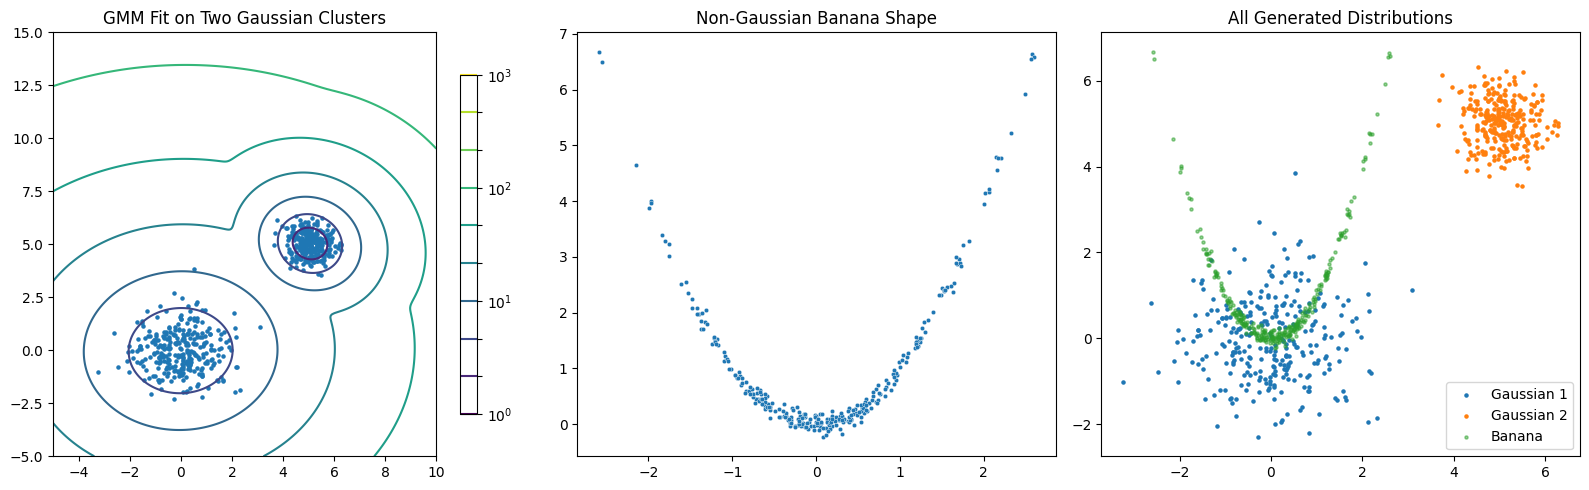

In [ ]:
# 📘 Task: Generate Gaussian & non-Gaussian test data and fit a Gaussian Mixture Model (GMM)
# Mentor Reference: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.mixture import GaussianMixture
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# ---------------------------------------
# 📊 1. Generate Synthetic Test Data
# ---------------------------------------

# Gaussian Cluster 1: spherical at (0, 0)
gaussian1 = np.random.normal(loc=0, scale=1.0, size=(300, 2))

# Gaussian Cluster 2: shifted and squeezed at (5, 5)
gaussian2 = np.random.normal(loc=5, scale=0.5, size=(300, 2))

# Non-Gaussian: Banana shape
x = np.random.normal(0, 1, 300)
y = x**2 + np.random.normal(0, 0.1, 300)
banana = np.stack([x, y], axis=1)

# Combine Gaussians for GMM
X = np.vstack([gaussian1, gaussian2])

# ---------------------------------------
# 🔍 2. Fit Gaussian Mixture Model (GMM)
# ---------------------------------------

gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X)

# Score the grid for density plotting
x_vals = np.linspace(-5, 10, 300)
y_vals = np.linspace(-5, 15, 300)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
grid = np.array([X_grid.ravel(), Y_grid.ravel()]).T
Z = -gmm.score_samples(grid).reshape(X_grid.shape)


plt.figure(figsize=(16, 5))

# Plot GMM data with contours
plt.subplot(1, 3, 1)
CS = plt.contour(X_grid, Y_grid, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
plt.colorbar(CS, shrink=0.8)
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.title("GMM Fit on Two Gaussian Clusters")

# Plot banana data
plt.subplot(1, 3, 2)
sns.scatterplot(x=banana[:, 0], y=banana[:, 1], s=10)
plt.title("Non-Gaussian Banana Shape")

# Plot all three datasets
plt.subplot(1, 3, 3)
plt.scatter(gaussian1[:, 0], gaussian1[:, 1], s=5, label='Gaussian 1')
plt.scatter(gaussian2[:, 0], gaussian2[:, 1], s=5, label='Gaussian 2')
plt.scatter(banana[:, 0], banana[:, 1], s=5, label='Banana', alpha=0.5)
plt.title("All Generated Distributions")
plt.legend()

plt.tight_layout()
plt.show()
